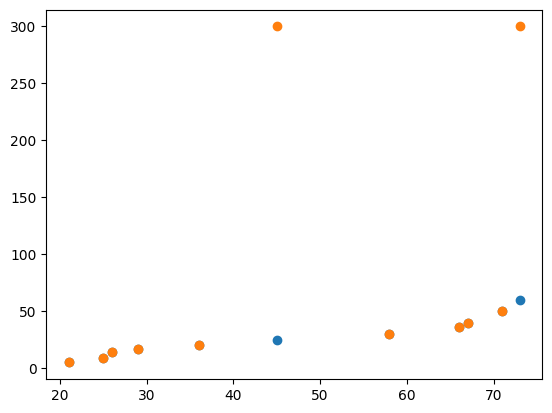

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Oct 10 21:47:31 2023

@author: alejandromurrietamendoza
"""

import matplotlib.pyplot as plt
import numpy as np

# Create a Simple regression
# "Fix" the model (x_1 and y_1) to improve the r_squared
# You MUST use the cook's ditance concept

x_0 = np.array([21, 25, 26, 29, 36, 45, 58, 66, 67, 71, 73])
y_0 = np.array([5, 9, 14, 17, 20, 25, 30, 36, 40, 50, 60])


x_1 = np.array([21, 25, 26, 29, 36, 45, 58, 66, 67, 71, 73])
y_1 = np.array([5, 9, 14, 17, 20, 300, 30, 36, 40, 50, 300])

fig = plt.figure()
ax1 = fig.add_subplot()

ax1.scatter(x=x_0, y=y_0, label="0")
ax1.scatter(x=x_1, y=y_1, label="1")
plt.show()


In [ ]:
plt.scatter(x=x_1)